# Import Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Import dataset into notebook.

In [2]:
data = pd.read_csv("titanic.csv")

# Data Exploration

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Select the row (record) for the first passenger.

In [4]:
data.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

Select rows (records) for the 1st to the 8th passenger.

In [5]:
data.iloc[0:8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Select the columns Name and Age.

In [6]:
data.loc[:,['Name','Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


Select specific name in the dataset

In [7]:
data.loc[data['Name'] == 'Braund, Mr. Owen Harris']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


This return no row, since no record with that name exist.

In [8]:
data.loc[data['Name'] == 'Braund, Mr. Owen Harr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Check the numnber of female and male who survived and died.

In [9]:
data.groupby(['Sex', 'Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

Check info of our columns.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
data.shape

(891, 12)

Drop all columns we do not need (PassengerId, Name, Ticket and Cabin)

In [12]:
data.drop(data.columns[[0,3,8,10]], axis=1, inplace=True)

In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Check for counts of missing values for each column.

In [14]:
data[data.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

Drop all NaNs (null values).

In [15]:
data_df=data.dropna()

In [16]:
data_df.shape

(712, 8)

Our dataset has reduced to 712 rows, though we have cleared all the null values.

In [17]:
data_df[data_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now our dataset has no missing value.

Descriptive statistics of our features.

In [18]:
data_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


The minimum age is 0.4 which shows there are children under 1 year old onboard the titanic.

# Visualization

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


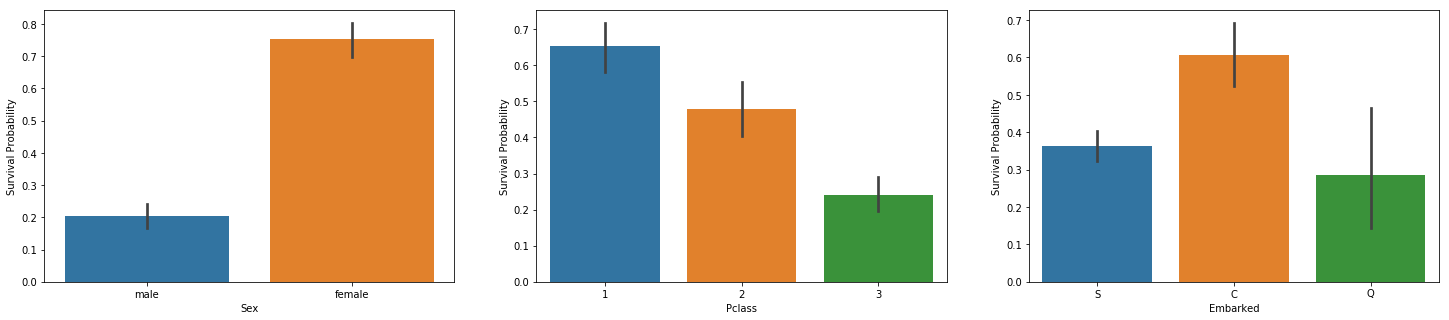

In [19]:
#We will check how Sex, Pclass and Embarked of Passengers affect their chances of survival.


Chart, items =plt.subplots(1,3,figsize=(25,5))

CGender = sns.barplot(x="Sex",y="Survived",data=data_df,ax=items[0])

CGender = CGender.set_ylabel("Survival Probability")

CClass = sns.barplot(x="Pclass",y="Survived",data=data_df,ax=items[1])

CClass = CClass.set_ylabel("Survival Probability")

CEmbarked = sns.barplot(x="Embarked",y="Survived",data=data_df,ax=items[2])

CEmbarked = CEmbarked.set_ylabel("Survival Probability")

Females, Passengers in Class 1 and Passengers who embarked at 'C'  have higher chances of survival.

Text(0,0.5,'Survived')

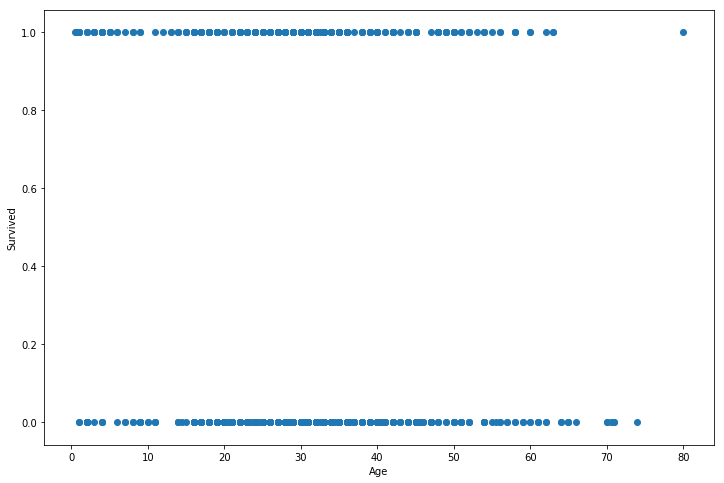

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(data_df['Age'], data_df['Survived'])

plt.xlabel('Age')
plt.ylabel('Survived')

Age and Survival do not say much.

Text(0,0.5,'Survived')

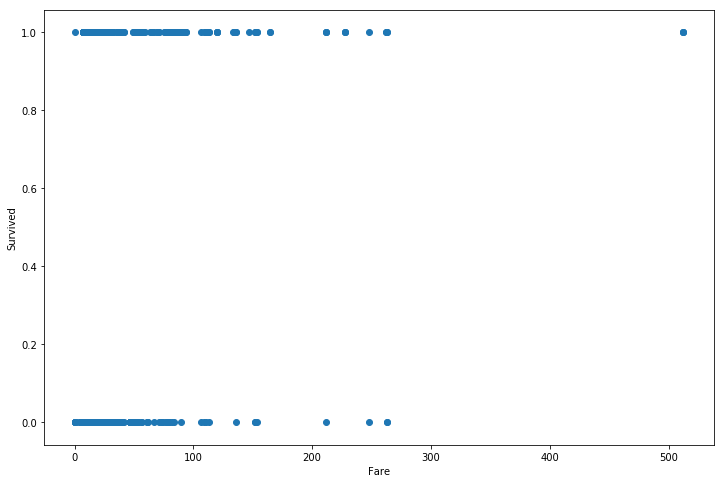

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(data_df['Fare'], data_df['Survived'])

plt.xlabel('Fare')
plt.ylabel('Survived')

More people who paid fare between 0 and 100 survive or do not survive, there are some people who paid very high fare like 500 who definately survived.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


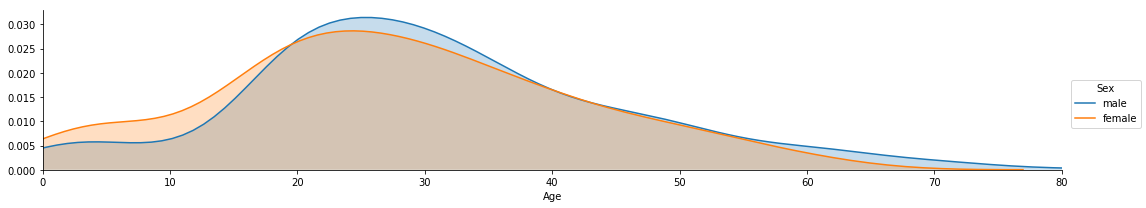

In [22]:
as_fig = sns.FacetGrid(data_df,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = data_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

More younger females than younger males are onboard while more older males are onboard than older females. 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


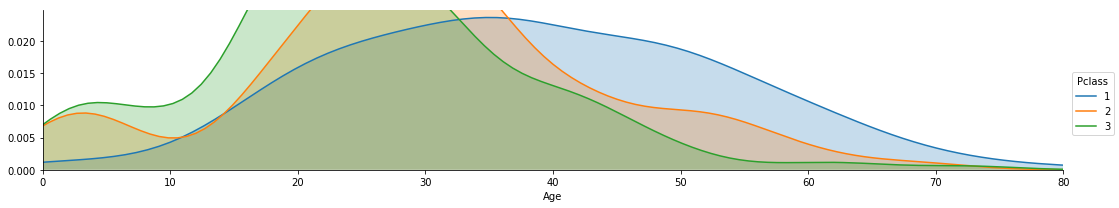

In [23]:
as_fig = sns.FacetGrid(data_df,hue='Pclass',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = data_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

From the above graphs, we can infer that there are more number of passengers with a age group of 20 to 40 in all the three classes.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


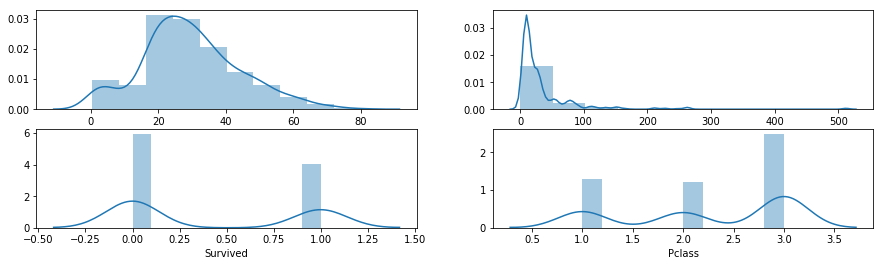

In [24]:
f, ax = plt.subplots(2,2,figsize=(15,4))
vis1 = sns.distplot(data_df["Age"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(data_df["Fare"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(data_df["Survived"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(data_df["Pclass"],bins=10, ax=ax[1][1])

Most Passengers are between the age 20 - 40 years. Most passengers also paid between 0 to 100 dollars/pounds.

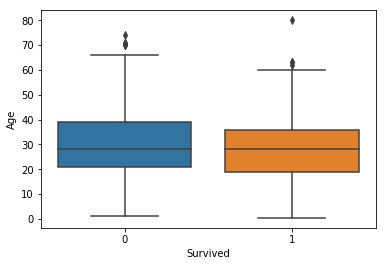

In [25]:
vis5 = sns.boxplot(data = data_df, x = "Survived", y = "Age")
fig = vis5.get_figure()
fig.savefig("fig1.png")

The boxplot shows we have extreme age between 60 - 80 years among those who survived or do not survived.  Also the median age of those who do not survived is more than those who survived.

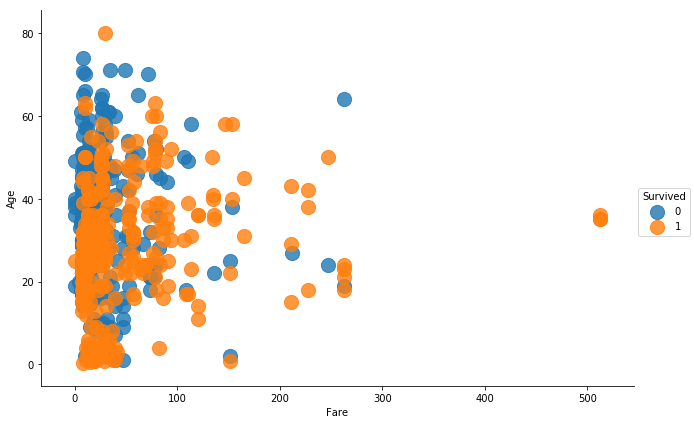

In [26]:
vis7 = sns.lmplot(data = data_df, x = "Fare", y = "Age",fit_reg=False, hue = "Survived",size = 6, aspect=1.5, scatter_kws = {'s':200}, )

Only very few passengers paid above 100 pounds, majorly those that survived and whose age is lower than 60 years. Two particular passengers paid up to 500 pounds and are in their 40s.

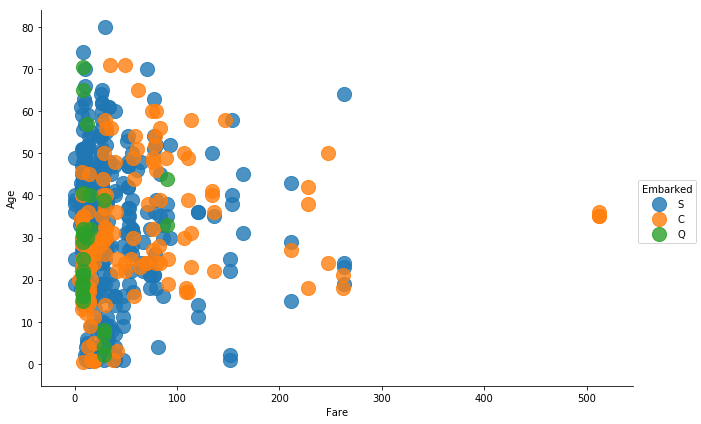

In [27]:
vis8= sns.lmplot(data = data_df, x = "Fare", y = "Age",fit_reg=False,\
                  hue = "Embarked",\
                 size = 6, aspect=1.5, scatter_kws = {'s':200},)

Embarked Routes are:
- Southampton, England 
– Cherbourg, France 
– Queenstown, Ireland

Passengers that paid the highest fares boarded the ship from Cherbourg in France.

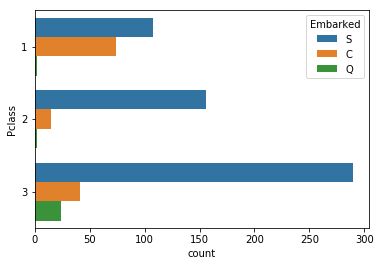

In [28]:
sns.countplot(y="Pclass", hue="Embarked", data=data_df);

Embarked Routes are:
- Southampton, England 
– Cherbourg, France 
– Queenstown, Ireland

Most Pclass 1, 2 and 3 Passengers boarded the ship at Southampton.
Very few Pclass 1 and 2 passengers boarded the ship at Queenstown.

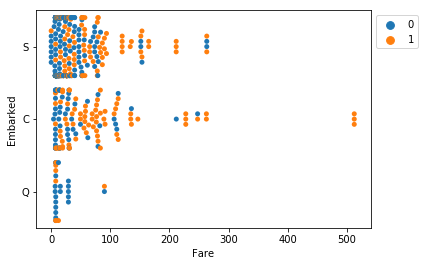

In [29]:
vis9 = sns.swarmplot(x="Fare", y="Embarked", hue="Survived", data=data_df)
vis9.legend_.remove()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

The swarm plot shows that most passengers that died boarded the ship at Southampton and paid between 0-300 pounds and the least that died boarded from Queenstown and paid less than 20 pounds.

In [30]:
data_data_corr = data_df.corr()

data_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


There is a positive relationship between Fare and Survived. This means the higher the fare the higher the chances of survival.

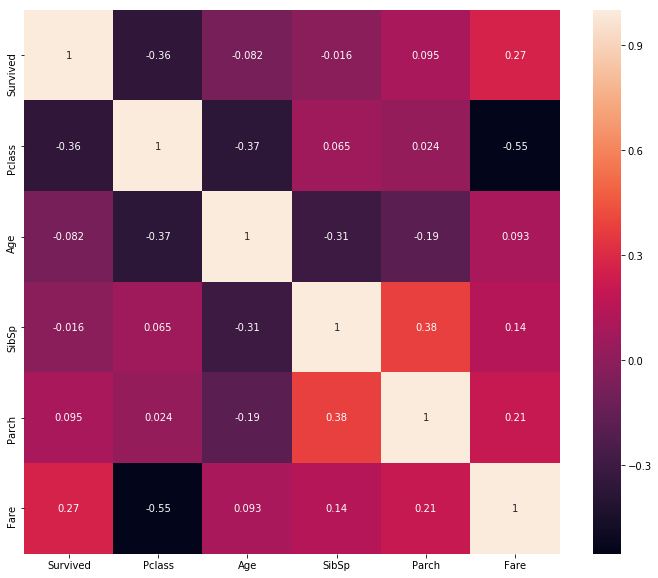

In [31]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(data_data_corr, annot=True)

The heatmap also shows the correlation between features. Survived and Fare have fairly high correlation.

# Processing For Machine Learning Model

Apply label encoding to change categorical string variable 'Sex' to represent '1' for Male and '0' for Female.

In [32]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
data_df['Sex'] = label_encoding.fit_transform(data_df['Sex'].astype(str))

data_df.head()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


Apply one hot-encoding to split 'Embarked' into dummies with seperate columns.

In [33]:
data_df = pd.get_dummies(data_df, columns=['Embarked'])

data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [34]:
data_df.shape

(712, 10)

We now have 10 columns due to the one hot-encoding we applied.

Split our dataset into test and train set.

In [35]:
from sklearn.model_selection import train_test_split

X = data_df.drop('Survived', axis=1)
Y = data_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [36]:
x_train.shape, y_train.shape

((569, 9), (569,))

In [37]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 116 to 541
Data columns (total 9 columns):
Pclass        569 non-null int64
Sex           569 non-null int64
Age           569 non-null float64
SibSp         569 non-null int64
Parch         569 non-null int64
Fare          569 non-null float64
Embarked_C    569 non-null uint8
Embarked_Q    569 non-null uint8
Embarked_S    569 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 32.8 KB


In [38]:
y_train

116    0
489    1
340    1
136    1
575    0
752    0
307    1
556    1
831    1
681    1
869    1
150    0
8      1
881    0
225    0
585    1
39     1
688    0
67     0
385    0
53     1
521    0
325    1
130    0
276    0
263    0
71     0
157    0
423    0
329    1
      ..
852    0
742    1
880    1
164    0
191    0
462    0
98     1
265    0
583    0
281    0
614    0
221    0
171    0
448    1
628    0
187    1
812    0
363    0
872    0
245    0
182    0
266    0
400    1
623    0
800    0
704    0
465    0
500    0
450    0
541    0
Name: Survived, dtype: int64

The training set is a subset of the data set used to train a model.

x_train is the training data set.
y_train is the set of labels to all the data in x_train.

The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

x_test is the test data set.
y_test is the set of labels to all the data in x_test.


In [39]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 236 to 644
Data columns (total 9 columns):
Pclass        143 non-null int64
Sex           143 non-null int64
Age           143 non-null float64
SibSp         143 non-null int64
Parch         143 non-null int64
Fare          143 non-null float64
Embarked_C    143 non-null uint8
Embarked_Q    143 non-null uint8
Embarked_S    143 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 8.2 KB


In [40]:
y_test

236    0
254    0
785    0
821    1
710    1
192    1
835    1
862    1
283    1
407    1
432    1
155    0
767    0
866    1
609    1
608    1
317    0
724    1
342    0
816    0
806    0
604    1
267    1
708    1
167    0
700    1
699    0
626    0
518    1
113    0
      ..
21     1
18     0
758    0
605    0
594    0
581    1
141    1
845    0
529    0
244    0
326    0
717    1
11     1
590    0
12     0
867    0
719    0
491    0
258    1
843    0
886    0
671    0
498    0
685    0
406    0
311    1
343    0
469    1
797    1
644    1
Name: Survived, dtype: int64

# Logistic regression for classification

We would apply Logistic regression for classification. Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.

In [41]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

Regularization helps to solve over fitting problem in machine learning. Overfitting model will be a very poor generalization of data. Regularization is therefore adding a penalty term to the objective function and control the model complexity using that penalty term. It can be used for many machine learning algorithms. 

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

The key difference between these two is the penalty term.

1. Ridge regression adds “squared magnitude” of coefficient as penalty term.

2. Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term.

The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.


For small values of C, regularization strength (λ ) increase which will create simple models which under-fit the data.

For big values of C, the power of regularization (λ ) will decrease which allowed the model to increase it's complexity, and therefore, over-fit the data.

In [42]:
y_pred = logistic_model.predict(x_test)

Predict the labels (Survived Column) of the  test data.

In [43]:
y_pred.shape

(143,)

In [44]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])

Lets check the y_pred against its actual label.

In [45]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [46]:
pred_results.head(10)

,y_pred,y_test
236,0,0
254,1,0
785,0,0
821,0,1
710,1,1
192,1,1
835,1,1
862,1,1
283,0,1
407,0,1


Our predictions (y_pred) aligned with their true labels.

In [47]:
print("Training set score: {:.3f}".format(logistic_model.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logistic_model.score(x_test, y_test)))

Training set score: 0.793
Test set score: 0.776


Our model performed well on both the training and test datasets. No obvious over-fitting.

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [49]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.7762237762237763
precision_score :  0.7037037037037037
recall_score :  0.7037037037037037


Our accuracy, precision and recall scores are impressive.

In [50]:
from sklearn import metrics

In [51]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))

Confusion Matrix
[[73 16]
 [16 38]]


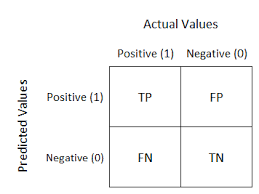

# k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training data set. To make a prediction for a new data point, the algorithm finds the closest data points in the training data set — its “nearest neighbors.”

k-Nearest-Neighbors (k-NN) is a supervised machine learning model. Supervised learning is when a model learns from data that is already labeled. A supervised learning model takes in a set of input objects and output values. The model then trains on that data to learn how to map the inputs to the desired output so it can learn to make predictions on unseen data.


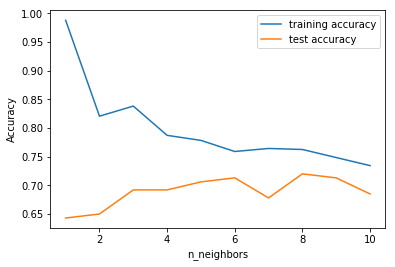

In [52]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:

# build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)

# record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))

# record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [53]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.69


Our Model perform well on the training data but fair on the test data.

In [54]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.71


Increasing our n_neighbors/k_neighbors to 35 on the test and train datasets. The result is ok.

In [55]:
#Predict with your Knn Model
y_predknn = knn.predict(x_test) 
print(metrics.accuracy_score(y_test, y_predknn))

0.7062937062937062


In [56]:
acc = accuracy_score(y_test, y_predknn)
prec = precision_score(y_test, y_predknn)
recall = recall_score(y_test, y_predknn)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.7062937062937062
precision_score :  0.6363636363636364
recall_score :  0.5185185185185185


Our accuracy, precision and recall scores are fairly ok.

In [57]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_predknn)))

Confusion Matrix
[[73 16]
 [26 28]]


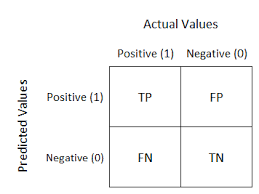

# What is Accuracy, Precision and Recall ?

Theses metrics are used for evaluating classification models. They are contained in a matrix called Confusion Matrix. This matrix is a performance measurement technique for Machine learning classification.The Key concept of confusion matrix is that it calculates the number of correct & incorrect predictions. It shows the path in which classification model is confused when it makes predictions.

# Accuracy

Classification accuracy is our starting point. It is the number of correct predictions made divided by the total number of predictions made, multiplied by 100 to turn it into a percentage.

Though we can achieve a high accuracy score, it might not mean the classifier is of overall good quality because there can be bias. i.e. Accuracy can be misleading. For example, in a problem where there is a large class imbalance, a model can predict the value of the majority class for all predictions and achieve a high classification accuracy.

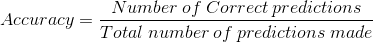

# Precision

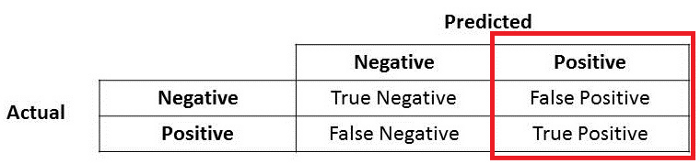

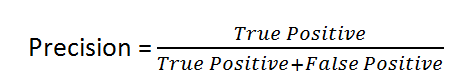

What do you notice for the denominator? The denominator is actually the Total Predicted Positive! So the formula becomes.

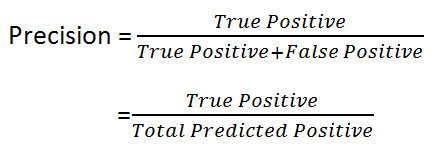

Precision talks about how precise is your true positives out of those predicted as positives i.e. how many of them are actual positive.
Precision is a good measure to determine, when the costs of False Positive is high. 

E.g. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam has been identified as spam (A case of False Positive). The email user might lose important emails if the precision is not high for the spam detection model. Here the cost of accepting False Positive is high or unbearable.

# Recall

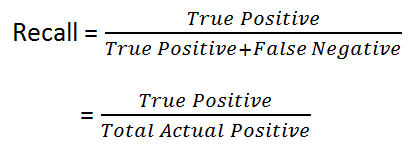

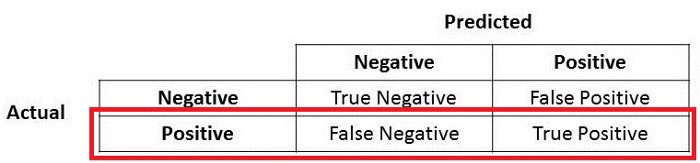

Recall actually calculates how many of the Actual Positives our model capture by labeling them as True Positive. Recall is used in selecting our best model when there is a high cost associated with False Negative.


For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

Similarly, in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.

# Specificity and Sensitivity 

In medical diagnosis, test sensitivity is the ability of a test to correctly identify those with the disease (true positive rate). Thus, it is a measure of how well your classifier identifies positive cases.

Whereas test specificity is the ability of the test to correctly identify those without the disease (true negative rate).Thus, it is a measure of how well your classifier identifies negative cases. 

Sensitivity describes how good the model is at predicting the positive class when the actual outcome is positive.

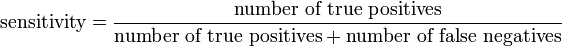

Specificity is also called the false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative.